<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_09_ProjNine_NonLinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [1]:
# utils
import os, sys, time, warnings, copy
import logging
import scipy.io
import pandas as pd
import numpy as np
from scipy import stats
# sklearn
import sklearn
from sklearn import (preprocessing,
                     metrics,
                     linear_model,
                     svm,
                     neighbors,
                     tree,
                     semi_supervised)
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV)
from sklearn.compose import ColumnTransformer
from sklearn.cross_decomposition import (PLSCanonical,
                                         PLSRegression,
                                         CCA)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import (GaussianProcessRegressor,
                                      kernels)
from sklearn.gaussian_process.kernels import (RBF,
                                              RationalQuadratic,
                                              ExpSineSquared,
                                              DotProduct,
                                              Matern)
from sklearn.naive_bayes import (GaussianNB,
                                 MultinomialNB,
                                 ComplementNB,
                                 BernoulliNB)
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              BaggingClassifier,
                              BaggingRegressor,
                              ExtraTreesClassifier,
                              ExtraTreesRegressor,
                              AdaBoostClassifier,
                              AdaBoostRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              StackingClassifier,
                              StackingRegressor,
                              VotingClassifier)
from sklearn.datasets import (load_iris,
                              load_diabetes,
                              load_digits,
                              make_regression,
                              make_classification,
                              load_breast_cancer)
from sklearn.multioutput import RegressorChain
# vis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sys.version)
print("sklearn: ", sklearn.__version__)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
sklearn:  1.5.2


## Discriminant Analysis

In [3]:
data = load_iris()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

x_train: (112, 4) x_test: (38, 4)
y_train: (112,) y_test: (38,)


Linear Discriminant Analysis

In [5]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [6]:
print("accurracy:", metrics.accuracy_score(y_test, y_pred))
print("confusion matrix (train set):\n", metrics.confusion_matrix(y_train, clf.predict(x_train)))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_pred))

accurracy: 0.9736842105263158
confusion matrix (train set):
 [[33  0  0]
 [ 0 40  1]
 [ 0  1 37]]
confusion matrix (test set):
 [[17  0  0]
 [ 0  8  1]
 [ 0  0 12]]


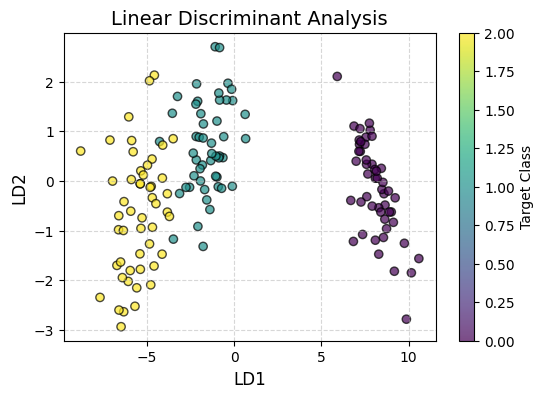

In [7]:
def visualize_lda(transformed_data, target_data):
    """
    Visualizes the results of Linear Discriminant Analysis (LDA).

    Args:
        transformed_data: Data transformed by LDA.
        target_data: Target labels for the data.
    """
    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(
        transformed_data[:, 0],
        transformed_data[:, 1],
        c=target_data,
        cmap="viridis",
        edgecolors="k",
        alpha=0.7,
        )
    plt.title("Linear Discriminant Analysis", fontsize=14)
    plt.xlabel("LD1", fontsize=12)
    plt.ylabel("LD2", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.colorbar(scatter, label="Target Class")
    plt.show()

transformed_data = clf.transform(data.data)
visualize_lda(transformed_data, data.target)

Quadratic Discriminant Analysis

In [8]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [9]:
print("accurracy:", metrics.accuracy_score(y_test, y_pred))
print("confusion matrix (train set):\n", metrics.confusion_matrix(y_train, clf.predict(x_train)))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_pred))

accurracy: 0.9736842105263158
confusion matrix (train set):
 [[33  0  0]
 [ 0 40  1]
 [ 0  1 37]]
confusion matrix (test set):
 [[17  0  0]
 [ 0  8  1]
 [ 0  0 12]]


## Ridge Classifier and Kernel Ridge

Ridge Classifier

In [10]:
def map_feature(x):
    return np.array([x[:, 0], x[:, 1], x[:, 0]**2 + x[:, 1]**2]).T

In [11]:
x = np.array([[0, 1], [1, 0], [2, 4], [4, 2], [0, -1], [-1, 0], [-2, -4], [-4, -2]])
y = np.array([1, 1, 0, 0, 1, 1, 0, 0])
z = map_feature(x)

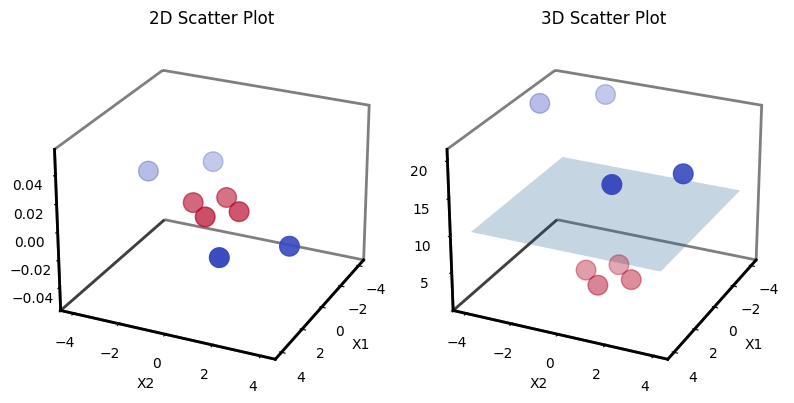

In [12]:
X, Y = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))
Z = np.zeros((10, 10)) + 10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), subplot_kw={'projection': '3d'})

ax1.view_init(elev=25, azim=25)
ax1.grid(False)
for axis in [ax1.xaxis, ax1.yaxis, ax1.zaxis]:
    axis.pane.set_color('white')
    axis.pane.set_edgecolor('black')
    axis.pane.set_linewidth(2)
    axis.pane.fill = False
    axis.line.set_color('black')
    axis.line.set_linewidth(2)


ax1.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm", s=200)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('2D Scatter Plot')

ax2.view_init(elev=25, azim=25)
ax2.grid(False)
for axis in [ax2.xaxis, ax2.yaxis, ax2.zaxis]:
    axis.pane.set_color('white')
    axis.pane.set_edgecolor('black')
    axis.pane.set_linewidth(2)
    axis.pane.fill = False
    axis.line.set_color('black')
    axis.line.set_linewidth(2)

ax2.scatter(z[:, 0], z[:, 1], z[:, 2], c=y, cmap="coolwarm", s=200)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('3D Scatter Plot')


ax2.plot_surface(X, Y, Z, alpha=0.25)

plt.tight_layout()
plt.show()

In [13]:
x_kern = metrics.pairwise.rbf_kernel(x, gamma = 1.0/x.shape[1]).round(3)
clf = linear_model.RidgeClassifier()
clf.fit(x_kern, y)
y_pred = clf.predict(x_kern)
print("accurracy:", metrics.accuracy_score(y, y_pred))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y, y_pred))

accurracy: 1.0
confusion matrix (test set):
 [[4 0]
 [0 4]]


Kernel Ridge Regression

In [14]:
data = load_diabetes()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

In [16]:
reg = KernelRidge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("mse: ", metrics.mean_squared_error(y_test, y_pred))

mse:  26632.72747725358


## Neighborhood Classifiers

In [17]:
data = load_digits()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

x_train: (1347, 64) x_test: (450, 64)
y_train: (1347,) y_test: (450,)


Neighbors Nearest Centroid

In [19]:
clf = neighbors.NearestCentroid(metric='euclidean', shrink_threshold=.25)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [20]:
print("accurracy:", metrics.accuracy_score(y_test, y_pred))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_pred))

accurracy: 0.9133333333333333
confusion matrix (test set):
 [[52  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  1  9]
 [ 1  1 43  1  0  0  0  0  1  1]
 [ 0  0  0 46  0  0  0  2  1  0]
 [ 0  4  0  0 38  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  5]
 [ 1  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  0  0  0 44  0  1]
 [ 0  3  0  0  0  0  0  0 27  0]
 [ 0  0  0  1  2  1  0  0  0 42]]


Neighbors KNeighbors Classifier

In [21]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [22]:
print("accurracy:", metrics.accuracy_score(y_test, y_pred))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_pred))

accurracy: 0.9844444444444445
confusion matrix (test set):
 [[52  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  1  0  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  1  0]
 [ 0  0  0  0  0  0  0 44  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  1  0  0  1 43]]


Neighbors Neighborhood Components Analysis

In [23]:
nca = neighbors.NeighborhoodComponentsAnalysis(n_components=3)
nca.fit(x_train, y_train)

NeighborhoodComponentsAnalysis(n_components=3)

In [24]:
clf = neighbors.KNeighborsClassifier()
clf.fit(nca.transform(x_train), y_train)

KNeighborsClassifier()

In [25]:
y_pred = clf.predict(nca.transform(x_test))

In [26]:
print("accurracy:", metrics.accuracy_score(y_test, y_pred))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_pred))

accurracy: 0.8622222222222222
confusion matrix (test set):
 [[46  0  0  0  0  4  1  0  0  1]
 [ 0 33  0  1  0  0  3  2  6  2]
 [ 0  1 44  2  0  0  0  0  1  0]
 [ 0  0  1 45  0  0  0  1  2  0]
 [ 0  1  0  0 41  1  0  0  0  0]
 [ 0  1  0  0  0 40  1  0  0  2]
 [ 2  2  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  1  0 43  0  1]
 [ 1  3  1  0  0  0  1  0 23  1]
 [ 1  0  0  4  1  2  0  4  3 31]]


Neighbors Radius Neighbors Classifier

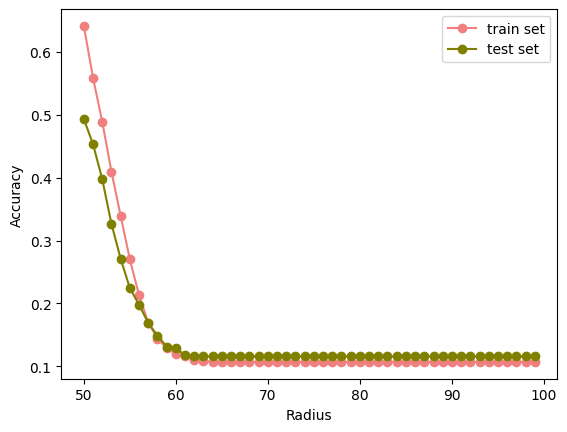

In [27]:
radiuses = np.arange(50, 100, 1)
acc_test = []
acc_train = []

for r in radiuses:
    clf = neighbors.RadiusNeighborsClassifier(radius=r)
    clf.fit(x_train, y_train)
    acc_train.append(clf.score(x_train, y_train))
    test_scores = cross_val_score(clf, x_test, y_test, cv=5)
    acc_test.append(np.mean(test_scores))

plt.plot(radiuses, acc_train, '-o', c='lightcoral', label='train set')
plt.plot(radiuses, acc_test, '-o', c='olive', label='test set')
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Neighborhood Regressor

In [28]:
data = load_diabetes()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

In [30]:
grid_search = GridSearchCV(neighbors.KNeighborsRegressor(),
                           {'n_neighbors': [3, 12, 24, 46, 64],
                            'weights': ['uniform', 'distance'],
                            'algorithm': ['brute', 'ball_tree', 'kd_tree']
                           },
                           cv =5
                           )

In [31]:
grid_search.fit(x_train, y_train)
neigh = grid_search.best_estimator_
print("best estimator_:", neigh)

best estimator_: KNeighborsRegressor(algorithm='brute', n_neighbors=24)


In [32]:
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)

print("mse:", metrics.mean_squared_error(y_test, y_pred))
print("r2:", metrics.r2_score(y_test, y_pred))

mse: 3473.9036067317315
r2: 0.45867960747598846


## Gaussian Process Regressor

In [33]:
def kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    """
    Radial Basis Function (RBF) kernel, also known as Gaussian kernel.

    Args:
    x1, x2 : numpy arrays
        Input data points for the kernel computation.
    length_scale : float
        Length scale parameter for the kernel (default=1.0).
    sigma_f : float
        Kernel amplitude (default=1.0).

    Returns:
    numpy array
        Covariance matrix calculated using the RBF kernel.
    """
    squared_distance = (x1 - x2.T) ** 2
    return sigma_f * np.exp(-squared_distance / (2 * length_scale ** 2))

np.random.seed(0)
n = 100 # number of test points
x_test = np.linspace(-5, 5, n).reshape(-1, 1)
mu = np.zeros(x_test.shape)
cov = kernel(x_test, x_test) # the prior covariance matrix

# Generate 10 samples from the multivariate normal prior
prior_samples = np.random.multivariate_normal(mu.ravel(), cov, 10)


Shapes of mu: (100, 1) (100,)
Posterior mean shape: (100, 1)
Posterior covariance shape: (100, 100)
Posterior standard deviation shape: (100, 1)


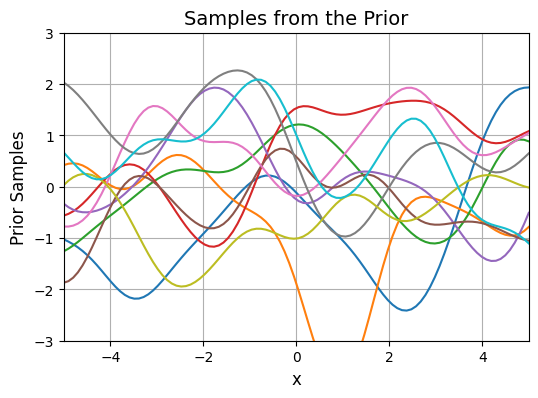

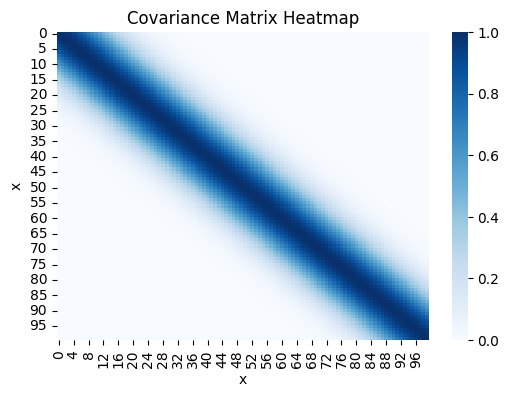

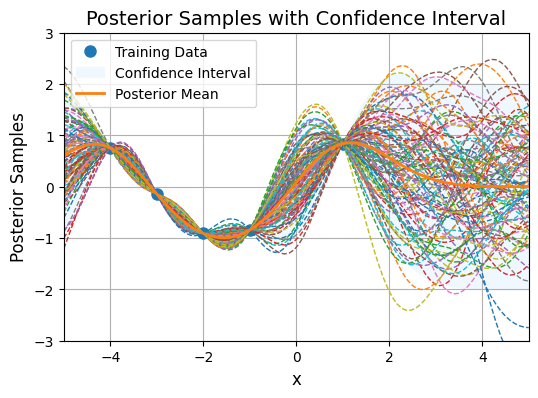

In [35]:
def kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    """
    Radial Basis Function (RBF) kernel, also known as Gaussian kernel.

    Args:
    x1, x2 : numpy arrays
        Input data points for the kernel computation.
    length_scale : float
        Length scale parameter for the kernel (default=1.0).
    sigma_f : float
        Kernel amplitude (default=1.0).

    Returns:
    numpy array
        Covariance matrix calculated using the RBF kernel.
    """
    squared_distance = (x1 - x2.T) ** 2
    return sigma_f * np.exp(-squared_distance / (2 * length_scale ** 2))

np.random.seed(0)
n = 100 # number of test points
x_test = np.linspace(-5, 5, n).reshape(-1, 1)

mu = np.zeros(x_test.shape)
cov = kernel(x_test, x_test) # prior covariance matrix

prior_samples = np.random.multivariate_normal(mu.ravel(), cov, 10)


x_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_train = np.sin(x_train)

# covariance matrices
cov_train = kernel(x_train, x_train)
cov_train_test = kernel(x_train, x_test)
cov_test = kernel(x_test, x_test)

cov_train_inv = np.linalg.inv(cov_train) # inverse of the training covariance matrix

# posterior mean and covariance
mu_post = cov_train_test.T.dot(cov_train_inv).dot(y_train)
cov_post = cov_test - cov_train_test.T.dot(cov_train_inv).dot(cov_train_test)
sd_post = np.sqrt(np.diag(cov_post)).reshape(mu_post.shape)

posterior_samples = np.random.multivariate_normal(mu_post.ravel(), cov_post, n)

print("Shapes of mu:", mu.shape, mu.ravel().shape)
print("Posterior mean shape:", mu_post.shape)
print("Posterior covariance shape:", cov_post.shape)
print("Posterior standard deviation shape:", sd_post.shape)

plt.figure(figsize=(6, 4))
plt.plot(x_test, prior_samples.T, lw=1.5)
plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xlabel("x", fontsize=12)
plt.ylabel("Prior Samples", fontsize=12)
plt.title("Samples from the Prior", fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cov, cmap="Blues", cbar=True)
ax.set(xlabel="x", ylabel="x", title="Covariance Matrix Heatmap")
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(x_train, y_train, 'o', markersize=8, label='Training Data')
plt.plot(x_test, posterior_samples.T, '--', lw=1)
plt.gca().fill_between(np.squeeze(x_test), np.squeeze(mu_post - 2 * sd_post),
                       np.squeeze(mu_post + 2 * sd_post), color="aliceblue", label="Confidence Interval")
plt.plot(x_test, mu_post, lw=2, label='Posterior Mean')
plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xlabel("x", fontsize=12)
plt.ylabel("Posterior Samples", fontsize=12)
plt.title("Posterior Samples with Confidence Interval", fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

Kernel: RBF(length_scale=1.93)
Log Marginal Likelihood: -3.4449378334621152



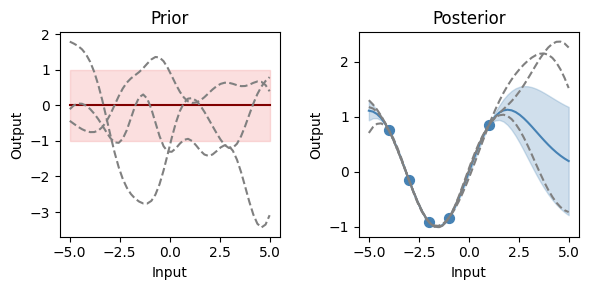

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: RationalQuadratic(alpha=1e+05, length_scale=1.93)
Log Marginal Likelihood: -3.4449718922774544



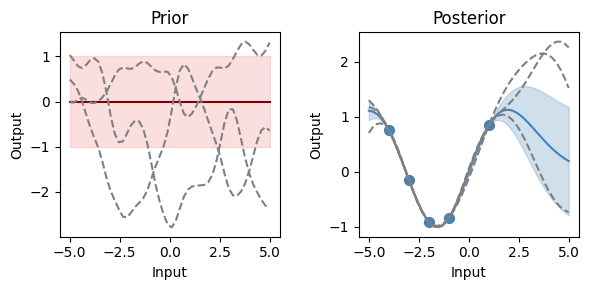

Kernel: ExpSineSquared(length_scale=0.000524, periodicity=2.32e+04)
Log Marginal Likelihood: -3.4449381449633156



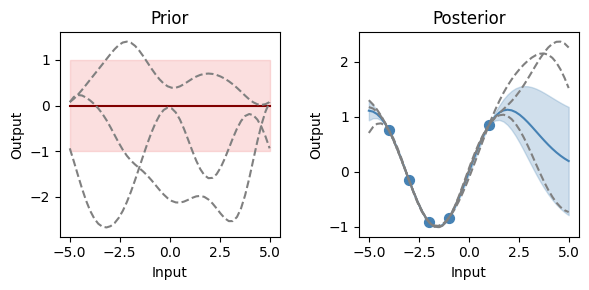

Kernel: DotProduct(sigma_0=1) ** 2
Log Marginal Likelihood: -150226375.36896336



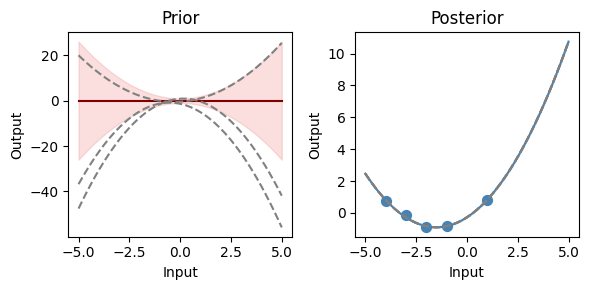

Kernel: Matern(length_scale=1.99, nu=1.5)
Log Marginal Likelihood: -5.131637070524744



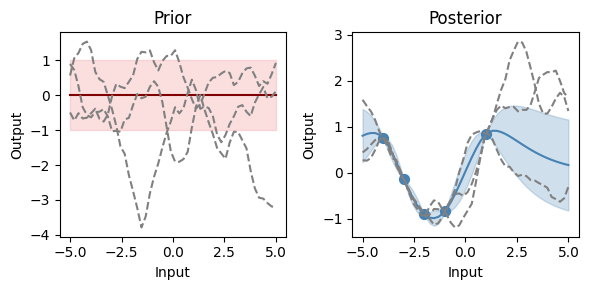

In [36]:
np.random.seed(0)
n = 50
kernels_list = [
    RBF(),
    RationalQuadratic(),
    ExpSineSquared(periodicity=10.),
    DotProduct(sigma_0=1.0)**2,
    Matern()
    ]

x_test = np.linspace(-5, 5, n).reshape(-1, 1)
x_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_train = np.sin(x_train)

for kernel in kernels_list:

    gp = GaussianProcessRegressor(kernel=kernel)

    mu_prior, sd_prior = gp.predict(x_test, return_std=True)
    samples_prior = gp.sample_y(x_test, n_samples=3)

    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.plot(x_test, mu_prior, label='Mean', color='maroon')
    plt.fill_between(np.squeeze(x_test),
                     np.squeeze(mu_prior - sd_prior),
                     np.squeeze(mu_prior + sd_prior),
                     color='lightcoral', alpha=0.25, label='Confidence Interval')
    plt.plot(x_test, samples_prior, '--', color='gray', label='Samples')
    plt.title("Prior")
    plt.xlabel("Input")
    plt.ylabel("Output")

    gp.fit(x_train, y_train)

    mu_post, sd_post = gp.predict(x_test, return_std=True)
    sample_post = gp.sample_y(x_test, n_samples=3).squeeze()


    plt.subplot(1, 2, 2)
    plt.plot(x_test, mu_post, label='Mean', color='steelblue')
    plt.fill_between(np.squeeze(x_test),
                     np.squeeze(mu_post - sd_post),
                     np.squeeze(mu_post + sd_post),
                     color='steelblue', alpha=0.25, label='Confidence Interval')
    plt.plot(x_test, sample_post, '--', color='gray', label='Samples')
    plt.scatter(x_train, y_train, c='steelblue', s=50, label='Training Data')
    plt.title("Posterior")
    plt.xlabel("Input")
    plt.ylabel("Output")

    print(f"Kernel: {gp.kernel_}")
    print(f"Log Marginal Likelihood: {gp.log_marginal_likelihood(gp.kernel_.theta)}\n")

    plt.tight_layout()
    plt.show()

## Canonical Methods for Regression

In [37]:
x, y = load_breast_cancer(return_X_y=True)

In [38]:
y = np.concatenate([y.reshape(-1,1), x[:, 5].reshape(-1,1)], axis = 1)
x = np.delete(x, [5], axis = 1)

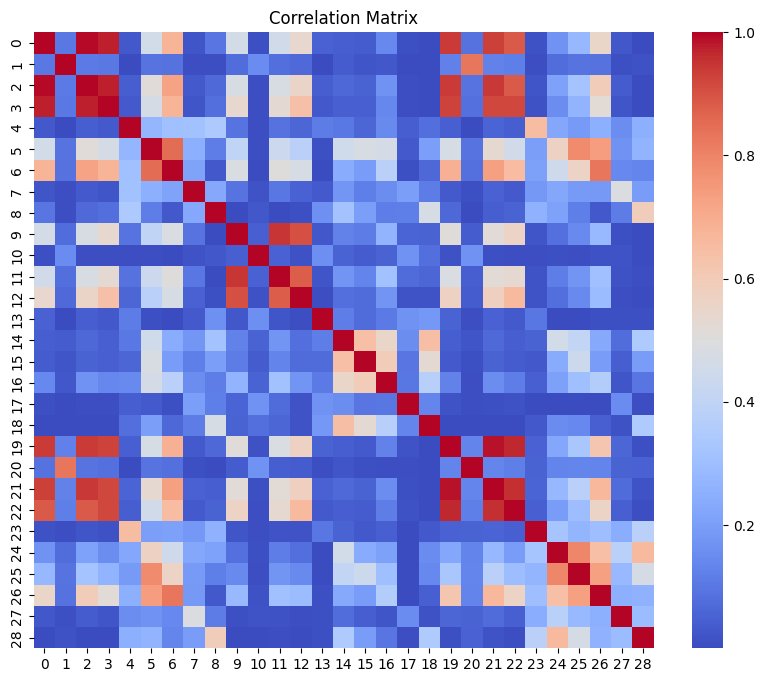

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.corrcoef(x, rowvar=False)**2, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [41]:
num_components = 2
pls_list = [
            (PLSCanonical(n_components=num_components), "PLSCanonical"),
            (PLSRegression(n_components=num_components), "PLSRegression"),
            (CCA(n_components=num_components), "CCA")
            ]
for model, name in pls_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(name)
    print("mse:", metrics.mean_squared_error(y_test, y_pred))
    print("r2:", metrics.r2_score(y_test, y_pred))

PLSCanonical
mse: 0.5423802168018583
r2: -3.018366926639481
PLSRegression
mse: 0.035306596163757496
r2: 0.7968544751506619
CCA
mse: 0.08125315462998436
r2: 0.2916141117706854


## Naive Bayes Methods for Classification

In [42]:
data = load_iris()

In [43]:
X = data.data
y = data.target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
def evaluate_naive_bayes(X_train, X_test, y_train, y_test):

    classifiers = {
        'GaussianNB': GaussianNB(),
        'MultinomialNB': MultinomialNB(),
        'ComplementNB': ComplementNB(),
        'BernoulliNB': BernoulliNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

    for name, model in classifiers.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
        try:
            auc_roc = metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
        except AttributeError:
            auc_roc = 'N/A'

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['AUC-ROC'].append(auc_roc)

    results_df = pd.DataFrame(results)

    return results_df

results = evaluate_naive_bayes(X_train, X_test, y_train, y_test)
results

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,0.977778,0.979365,0.977778,0.977745,1.000000
1,MultinomialNB,0.955556,0.955556,0.955556,0.955556,0.995139
2,ComplementNB,0.711111,0.566667,0.711111,0.614815,0.993750
3,BernoulliNB,0.288889,0.083457,0.288889,0.129502,0.500000


## Decision Tree, Random Forest, Gradient Boosting, K-Neighbors, and Support Vector

In [46]:
data = load_iris()

In [47]:
X = data.data
y = data.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
def evaluate_classifiers(X_train, X_test, y_train, y_test):

    classifiers = {
        'Decision Tree': tree.DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'K-Neighbors': neighbors.KNeighborsClassifier(),
        'Support Vector': svm.SVC(probability=True)
        }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

    for name, model in classifiers.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
        auc_roc = metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['AUC-ROC'].append(auc_roc)

    results_df = pd.DataFrame(results)

    return results_df

results = evaluate_classifiers(X_train, X_test, y_train, y_test)
results

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Decision Tree,1.0,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0,1.0
2,Gradient Boosting,1.0,1.0,1.0,1.0,1.0
3,K-Neighbors,1.0,1.0,1.0,1.0,1.0
4,Support Vector,1.0,1.0,1.0,1.0,1.0


## Clfs: Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boosting, and Hist Gradient Boosting

In [50]:
X, y = make_classification(n_samples=1000, n_features=50, n_classes=2)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
model_list = [
    (BaggingClassifier(estimator=linear_model.RidgeClassifier(), n_estimators=20), "BaggingClassifier"),
    (RandomForestClassifier(), "RandomForestClassifier"),
    (ExtraTreesClassifier(), "ExtraTreesClassifier"),
    (AdaBoostClassifier(), "AdaBoostClassifier"),
    (GradientBoostingClassifier(), "GradientBoostingClassifier"),
    (HistGradientBoostingClassifier(), "HistGradientBoostingClassifier")
    ]

In [53]:
def evaluate_classifiers(X_train, X_test, y_train, y_test):

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

    for clf, name in model_list:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)

        if hasattr(clf, "predict_proba"):
            auc_roc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1], multi_class='ovr', average='weighted')
        else:
            auc_roc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['AUC-ROC'].append(auc_roc)

    results_df = pd.DataFrame(results)
    return results_df

results = evaluate_classifiers(X_train, X_test, y_train, y_test)
results

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,BaggingClassifier,0.940000,0.941194,0.940000,0.939925,0.960873
1,RandomForestClassifier,0.960000,0.960306,0.960000,0.959982,0.986617
2,ExtraTreesClassifier,0.950000,0.950468,0.950000,0.949969,0.981059
3,AdaBoostClassifier,0.940000,0.940000,0.940000,0.940000,0.980703
4,GradientBoostingClassifier,0.956667,0.956832,0.956667,0.956654,0.989285
5,HistGradientBoostingClassifier,0.960000,0.960000,0.960000,0.960000,0.986884


## Voting Classifier

In [54]:
clf_bagging = BaggingClassifier(estimator=linear_model.RidgeClassifier(), random_state=42)
clf_gaussian_nb = GaussianNB()
clf_hist_gb = HistGradientBoostingClassifier(random_state=42)

estimators = [
    ("Bagging_Ridge", clf_bagging),
    ("Gaussian_NB", clf_gaussian_nb),
    ("Hist_GradientBoosting", clf_hist_gb)
    ]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train, y_train)
yc_pred = voting_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, yc_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

Voting Classifier Accuracy: 0.9567


## Regs: Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boosting, and Hist Gradient Boosting

In [55]:
X, y = make_regression(n_samples=1000, n_features=50, n_targets=1, random_state=42)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
model_list = [
    (BaggingRegressor(estimator=linear_model.Ridge(), n_estimators=20, random_state=42), "BaggingRegressor"),
    (RandomForestRegressor(random_state=42), "RandomForestRegressor"),
    (ExtraTreesRegressor(random_state=42), "ExtraTreesRegressor"),
    (AdaBoostRegressor(random_state=42), "AdaBoostRegressor"),
    (GradientBoostingRegressor(random_state=42), "GradientBoostingRegressor"),
    (HistGradientBoostingRegressor(random_state=42), "HistGradientBoostingRegressor")
    ]

In [58]:
def fit_model(regressor):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    return mse, mae, r2

results = []

for reg, name in model_list:
    mse, mae, r2 = fit_model(reg)
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
        })

df = pd.DataFrame(results)
df

,Model,MSE,MAE,R²
0,BaggingRegressor,0.060209,0.193214,0.999998
1,RandomForestRegressor,3770.816882,44.769926,0.851116
2,ExtraTreesRegressor,2329.571046,34.619607,0.908021
3,AdaBoostRegressor,4759.014275,50.922016,0.812098
4,GradientBoostingRegressor,1219.796986,25.356813,0.951838
5,HistGradientBoostingRegressor,1263.687328,24.741493,0.950105


## Stacking Regressor

In [59]:
estimators = [
    ('ridge', linear_model.Ridge()),
    ('linear', linear_model.LinearRegression()),
    ('knr', neighbors.KNeighborsRegressor())
    ]
final_estimator = GradientBoostingRegressor()
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
reg.fit(X_train, y_train)
yr_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_test, yr_pred)
print("mse:", mse)

mse: 4.806693332648084


## Regressor Chain Multiple Outputs

In [60]:
X, y = make_regression(n_samples=100, n_features=2, n_targets=3, random_state=42)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
base_regressor = linear_model.LinearRegression()
regressor = RegressorChain(base_regressor, order='random', random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Multioutput Regression using Chain Method:", mse)

Mean Squared Error for Multioutput Regression using Chain Method: 9.283553543936667e-26


## Semi-supervised Models

In [63]:
data = load_iris()

In [64]:
target_orig = copy.deepcopy(data.target)

In [65]:
rng = np.random.RandomState(0)

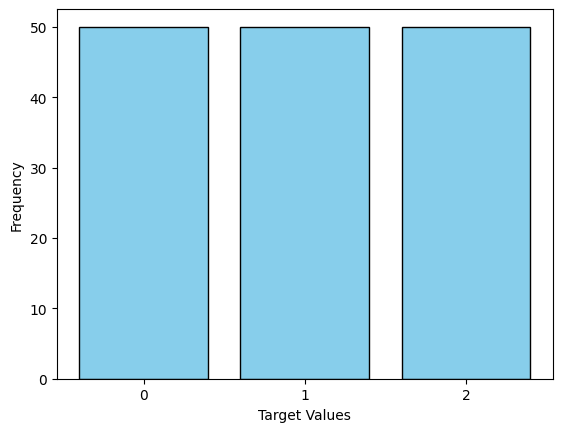

In [66]:
unique_values, counts = np.unique(data.target, return_counts=True)

plt.bar(unique_values, counts, color='skyblue', edgecolor='black')
plt.xlabel("Target Values")
plt.ylabel("Frequency")
plt.xticks(unique_values)
plt.show()

In [67]:
unl_pts = rng.rand(data.target.shape[0]) < 0.8
print("Total:", data.target.shape[0],
     "\nUnlabeled:", len(unl_pts[unl_pts==True]),
     "\nPercent unlabeled:", len(unl_pts[unl_pts==True])/data.target.shape[0]
      )

Total: 150 
Unlabeled: 123 
Percent unlabeled: 0.82


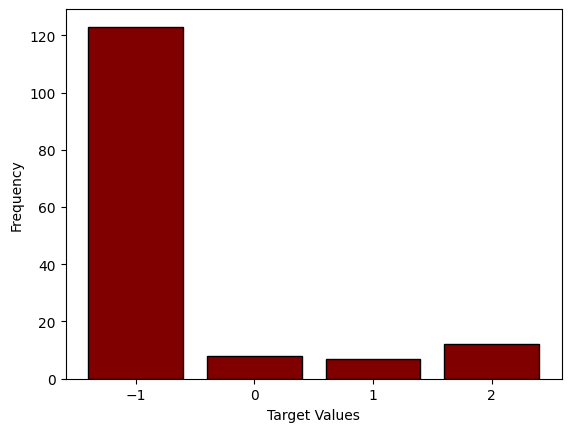

In [68]:
data.target[unl_pts] = -1

unique_values, counts = np.unique(data.target, return_counts=True)

plt.bar(unique_values, counts, color='maroon', edgecolor='black')
plt.xlabel("Target Values")
plt.ylabel("Frequency")
plt.xticks(unique_values)
plt.show()

Self Training Classifier

Accuracy score: 0.9466666666666667


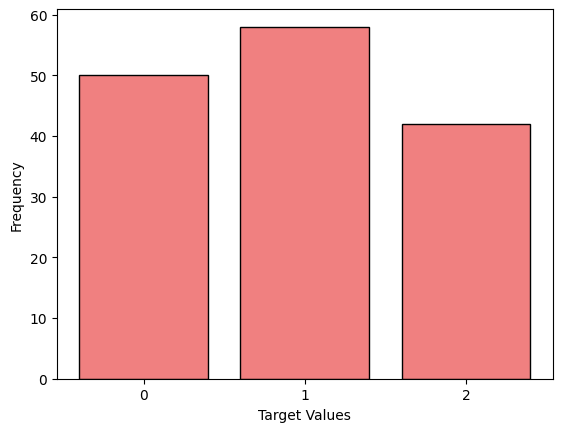

In [69]:
svc = svm.SVC(probability=True, gamma = "auto")
lbl = semi_supervised.SelfTrainingClassifier(svc)
lbl.fit(data.data, data.target)
y_pred = lbl.predict(data.data)
acu = metrics.accuracy_score(target_orig, y_pred)

print("Accuracy score:", acu)

unique_values, counts = np.unique(y_pred, return_counts=True)

plt.bar(unique_values, counts, color='lightcoral', edgecolor='black')
plt.xlabel("Target Values")
plt.ylabel("Frequency")
plt.xticks(unique_values)
plt.show()

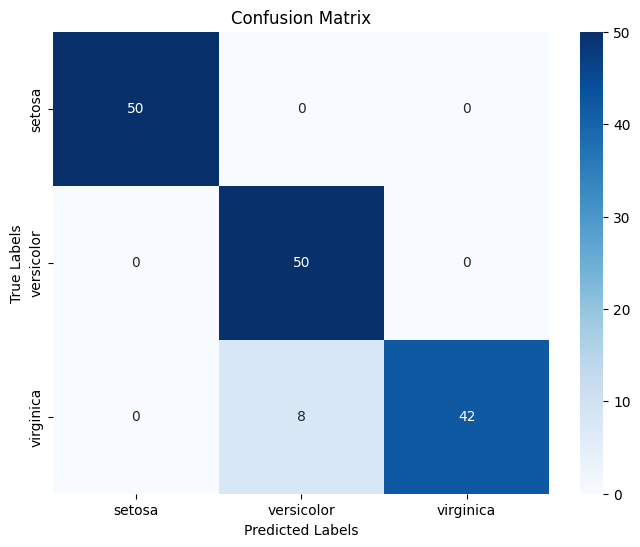

In [70]:
cm = metrics.confusion_matrix(target_orig, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Label Propagation

Accuracy score: 0.94


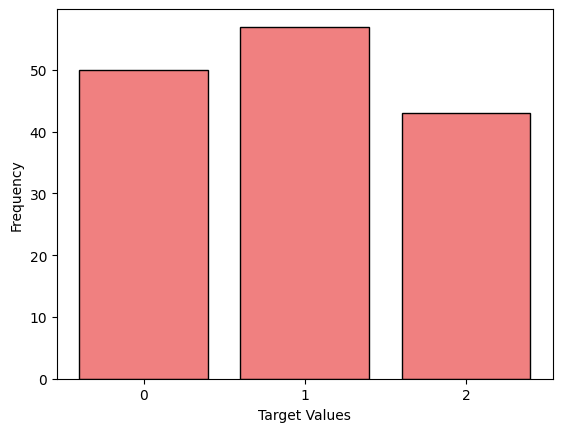

In [71]:
lbl = semi_supervised.LabelPropagation()
lbl.fit(data.data, data.target)
y_pred = lbl.predict(data.data)
acu = metrics.accuracy_score(target_orig, y_pred)

print("Accuracy score:", acu)

unique_values, counts = np.unique(y_pred, return_counts=True)

plt.bar(unique_values, counts, color='lightcoral', edgecolor='black')
plt.xlabel("Target Values")
plt.ylabel("Frequency")
plt.xticks(unique_values)
plt.show()

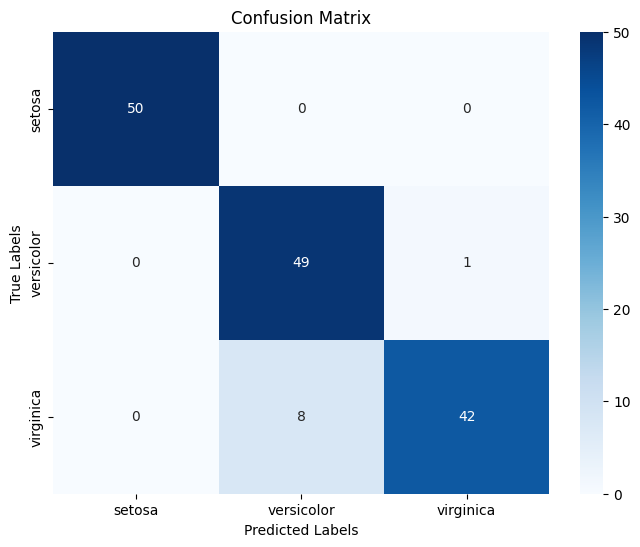

In [72]:
cm = metrics.confusion_matrix(target_orig, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Label Spreading

Accuracy score: 0.9466666666666667


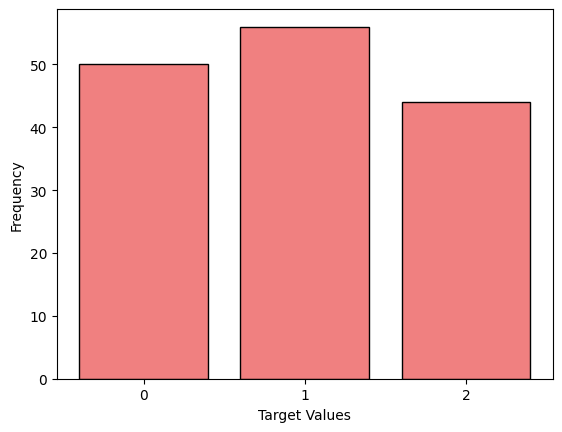

In [73]:
lbl = semi_supervised.LabelSpreading()
lbl.fit(data.data, data.target)
y_pred = lbl.predict(data.data)
acu = metrics.accuracy_score(target_orig, y_pred)

print("Accuracy score:", acu)

unique_values, counts = np.unique(y_pred, return_counts=True)

plt.bar(unique_values, counts, color='lightcoral', edgecolor='black')
plt.xlabel("Target Values")
plt.ylabel("Frequency")
plt.xticks(unique_values)
plt.show()

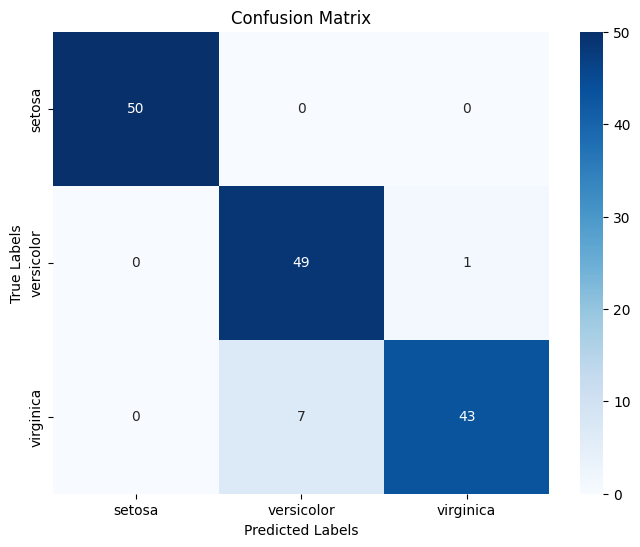

In [74]:
cm = metrics.confusion_matrix(target_orig, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()